In [4]:
import numpy as np
import pandas as pd

In [31]:
df = pd.read_csv('/placement.csv')

In [37]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [38]:
df = df.iloc[:,1:]

In [40]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [44]:
import matplotlib.pyplot as plt

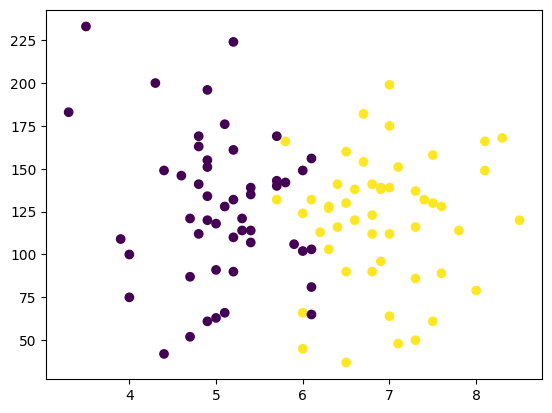

In [48]:
plt.scatter(df['cgpa'],df['iq'],c = df['placement'])

In [50]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [52]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [54]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [56]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [58]:
x_train

,cgpa,iq
2,5.3,121.0
50,3.5,233.0
67,5.0,118.0
98,6.3,103.0
91,7.5,158.0
...,...,...
49,5.4,135.0
9,5.1,66.0
41,5.4,114.0
73,4.9,61.0


In [60]:
y_train

,placement
2,0
50,0
67,0
98,1
91,1
...,...
49,0
9,0
41,0
73,0


In [62]:
x_test

,cgpa,iq
52,7.0,175.0
90,7.3,86.0
32,7.0,139.0
43,6.8,141.0
8,6.1,156.0
26,7.0,199.0
82,6.5,37.0
25,5.0,91.0
45,6.0,66.0
15,5.1,176.0


In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler = StandardScaler()

In [65]:
x_train = scaler.fit_transform(x_train)

In [67]:
x_train

array([[-0.5567295 , -0.05860823],
       [-2.10373086,  2.86600028],
       [-0.81456306, -0.13694595],
       [ 0.3027157 , -0.52863459],
       [ 1.33404994,  0.90755709],
       [ 1.33404994, -1.62536278],
       [-1.75995278, -0.37195914],
       [ 0.7324383 , -0.00638307],
       [-0.64267402,  0.98589481],
       [ 1.1621609 , -0.18917111],
       [ 0.81838282,  0.41141814],
       [ 0.38866022,  0.46364329],
       [-0.90050758,  0.28085526],
       [ 1.1621609 ,  0.35919299],
       [ 0.99027186, -1.96482627],
       [ 0.13082666,  0.22863011],
       [-0.47078498,  0.41141814],
       [ 1.5918835 , -0.24139626],
       [ 0.3027157 ,  0.12417981],
       [-1.07239662, -0.05860823],
       [-0.9864521 ,  1.19479542],
       [-0.9864521 ,  0.46364329],
       [-0.64267402, -0.34584656],
       [ 0.47460474,  0.95978224],
       [-1.33023018,  0.6725439 ],
       [ 0.04488214,  0.6725439 ],
       [ 0.47460474, -0.86809808],
       [ 1.41999446, -0.89421066],
       [-0.90050758,

In [68]:
x_test= scaler.transform(x_test)

In [70]:
x_test

array([[ 0.90432734,  1.35147088],
       [ 1.1621609 , -0.97254839],
       [ 0.90432734,  0.41141814],
       [ 0.7324383 ,  0.46364329],
       [ 0.13082666,  0.85533193],
       [ 0.90432734,  1.9781727 ],
       [ 0.47460474, -2.25206461],
       [-0.81456306, -0.84198551],
       [ 0.04488214, -1.4947999 ],
       [-0.72861854,  1.37758345]])

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
clf = LogisticRegression()

In [76]:
#model training
clf.fit(x_train,y_train)

LogisticRegression()

In [84]:
y_pred = clf.predict(x_test)

In [85]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

In [80]:
y_test

,placement
52,1
90,1
32,1
43,1
8,0
26,1
82,1
25,0
45,1
15,0


In [81]:
from sklearn.metrics import accuracy_score

In [87]:
accuracy_score(y_test,y_pred)

0.8

In [88]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

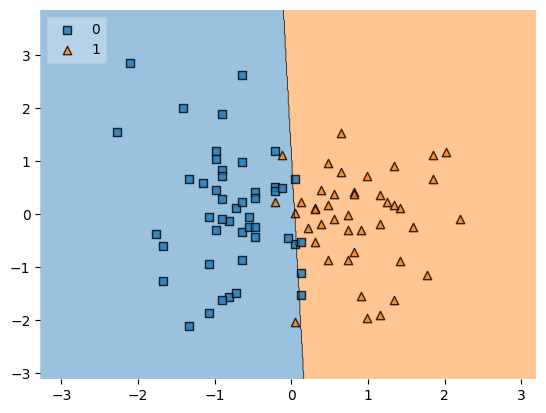

In [90]:
plot_decision_regions(x_train, y_train.values,clf=clf, legend=2)

In [91]:
import pickle

In [94]:
pickle.dump(clf,open('model.pkl','wb'))